<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/PCA_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA: Reconstrucción de espectro
Obtenido de: https://www.astroml.org/book_figures/chapter7/fig_spec_reconstruction.html

In [1]:
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.9 MB/s eta 0:00:00


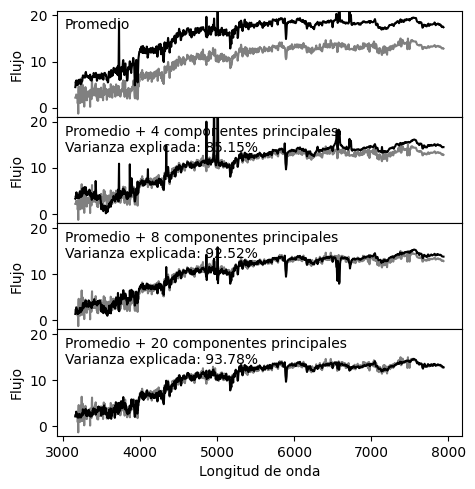

In [7]:
# Importar bibliotecas necesarias
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results

# Cargar los datos de espectros corregidos del SDSS
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# Calcular los valores propios y componentes propios
eigenvalues = data['evals'] ** 2
cumulative_eigenvalues = eigenvalues.cumsum()
cumulative_eigenvalues /= cumulative_eigenvalues[-1]
eigenvectors = data['evecs']
mean_spectrum = spectra.mean(0)
sample_spectrum = spectra[1]
coefficients = np.dot(eigenvectors, sample_spectrum - mean_spectrum)

# Crear una figura para mostrar los resultados
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, sample_spectrum, '-', c='gray')
    ax.plot(wavelengths, mean_spectrum + np.dot(coefficients[:n], eigenvectors[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('Flujo')

    if n == 0:
        text = "Promedio"
    elif n == 1:
        text = "Promedio + 1 componente principal\n"
        text += f"Varianza explicada: {cumulative_eigenvalues[n - 1]:.2%}"
    else:
        text = f"Promedio + {n} componentes principales\n"
        text += f"Varianza explicada: {cumulative_eigenvalues[n - 1]:.2%}"

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel('Longitud de onda')
plt.show()


# Modificamos la selección del rango de eigenvectores y coeficientes en el enumerate.

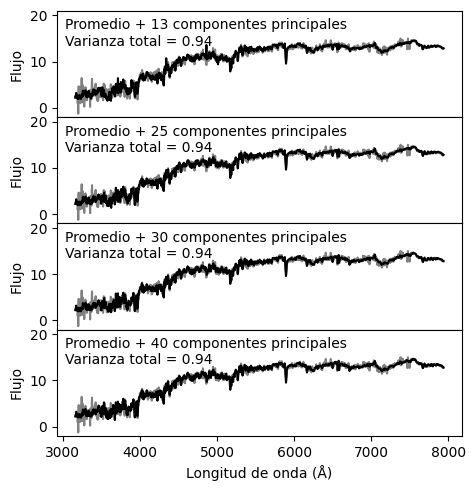

In [8]:
# Crear una figura con ajustes específicos
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

# Crear subgráficos para diferentes valores de n
for i, n in enumerate([13, 25, 30, 40]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, sample_spectrum, '-', c='gray')
    ax.plot(wavelengths, mean_spectrum + np.dot(coefficients[:n], eigenvectors[:n]), '-k')

    # Formatear los ejes si no es el último subgráfico
    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('Flujo')

    # Definir el texto para la descripción
    if n == 0:
        text = "Promedio"
    elif n == 1:
        text = "Promedio + 1 componente principal\n"
        text += f"Varianza total = {evals_cs[n - 1]:.2f}"
    else:
        text = f"Promedio + {n} componentes principales\n"
        text += f"Varianza total = {evals_cs[n - 1]:.2f}"

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

# Definir etiqueta para el eje x
fig.axes[-1].set_xlabel('Longitud de onda (Å)')
plt.show()


Las gráficas no tienen cambio perceptible a simple vista

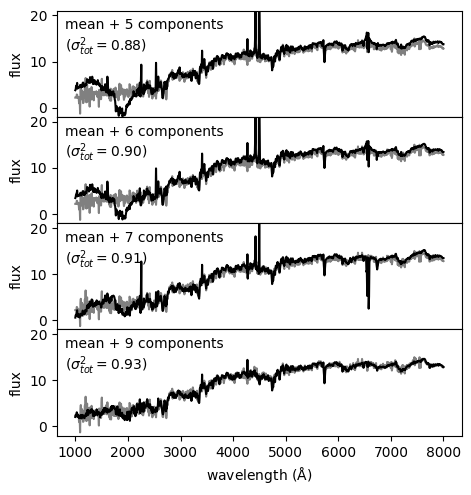

In [ ]:

fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)
#pdb.set_trace()

for i, n in enumerate([5, 6, 7, 9]):
    #breakpoint()
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

La varianza no tiene cambio relevante a partir del valor 13 (94%). Y desde el valor 6 tiene valor mayor a 90%